In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
#import data
dataUber = pd.read_csv('Uber Request Data.csv')

In [3]:
#read data
dataUber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [4]:
# 'Driver id' column is of no use here so we can drop it
dataUber = dataUber.drop(['Driver id'],axis=1)
dataUber.head()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp
0,619,Airport,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [5]:
# by looking at the 'Request timestamp' and 'drop timestamp' column 
# we come to know that we need to correct the timestamp format
dataUber['Request timestamp'] = pd.to_datetime(dataUber['Request timestamp'])
dataUber['Drop timestamp'] = pd.to_datetime(dataUber['Drop timestamp'])


In [6]:
dataUber.head()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [7]:
#getting info of columns(total entries, null values, data type etc)
dataUber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Status             6745 non-null   object        
 3   Request timestamp  6745 non-null   datetime64[ns]
 4   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 263.6+ KB


In [8]:
#count of total observations
dataUber.shape

(6745, 5)

In [9]:
#statistical information of numerical columns
dataUber.describe()

,Request id
count,6745.000000
mean,3384.644922
std,1955.099667
min,1.000000
25%,1691.000000
50%,3387.000000
75%,5080.000000
max,6766.000000


In [10]:
#total pickup points present in the dataset
pickepPoints = dataUber['Pickup point'].unique()
pickepPoints

array(['Airport', 'City'], dtype=object)

In [11]:
#column wise inspection of null values
dataUber.isnull().sum()

Request id              0
Pickup point            0
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [12]:
#as we can see there are lot of null values present in the 'Drop timestamp'
#column, so wee need to inspect this column further

#find all null value rows
drop_timestamp_null_rows = dataUber[(dataUber['Drop timestamp'].isnull())]
drop_timestamp_null_rows

,Request id,Pickup point,Status,Request timestamp,Drop timestamp
2831,2905,City,Cancelled,2016-07-13 06:08:41,NaT
2832,4805,City,Cancelled,2016-07-14 17:07:58,NaT
2833,5202,Airport,Cancelled,2016-07-14 20:51:37,NaT
2834,5927,City,Cancelled,2016-07-15 10:12:40,NaT
2835,2347,Airport,Cancelled,2016-12-07 19:14:00,NaT
...,...,...,...,...,...
6740,6745,City,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,No Cars Available,2016-07-15 23:54:39,NaT


In [13]:
#group by status
gb_object = drop_timestamp_null_rows.groupby('Status')
#checking the entries 
gb_object.size()

Status
Cancelled            1264
No Cars Available    2650
dtype: int64

By looking at the null value observation we can notice that 'Drop timestamp' is empty in the two cases 
1) when the trip is cancelled
2) when no cars available 
So we can clearly say that the null values are valid because Trip is not completed, so we cant have drop timestamp, so we wont remove these rows 

In [14]:
#check for any duplicate values
isDup = dataUber[dataUber.duplicated()].index
len(isDup)

0

In [15]:
#pickup point column - univariate analysis

pickup_point = pd.crosstab(index = dataUber['Pickup point'], columns = 'count')


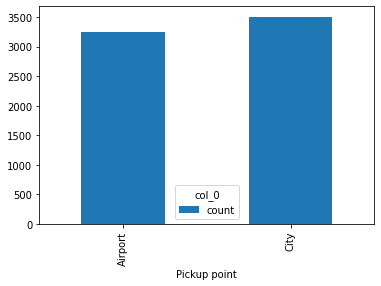

In [16]:
pickup_point.plot.bar()

No significant difference in count found between Airpot and city pickup point

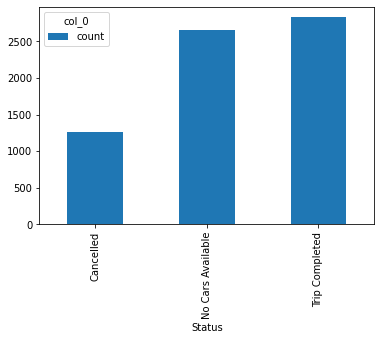

In [17]:
#status column - univariate analysis

status_col = pd.crosstab(index=dataUber['Status'],columns='count')
status_col.plot.bar()

Significant difference found between 'Cancelled' and 'No of cars available'

In [18]:
#Bivariate analysis on 'Status' and 'Pickup point'

stp = dataUber.groupby(['Status','Pickup point'])
stp.size()

Status             Pickup point
Cancelled          Airport          198
                   City            1066
No Cars Available  Airport         1713
                   City             937
Trip Completed     Airport         1327
                   City            1504
dtype: int64

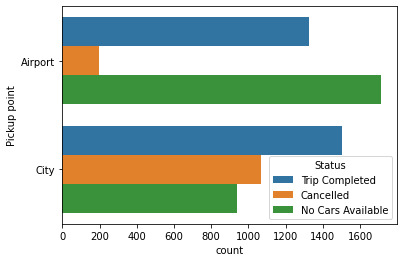

In [19]:
#count plot to draw some inference
sb.countplot(y = dataUber['Pickup point'],
             hue = dataUber['Status'] ,
             data = dataUber)


In [20]:
#inference 1 -> There is huge difference in trip cancelled from city to airport
#inference 2 -> Availability of cars is a concern in Airport

In [21]:
dataUber['RequestHour'] = dataUber['Request timestamp'].dt.hour

In [22]:
#deriving time slots
dataUber['Request TimeSlot'] = 'Early Morning'


In [23]:
dataUber.loc[dataUber['RequestHour'].between(4,11),'Request TimeSlot'] = 'Morning'


In [24]:
dataUber.loc[dataUber['RequestHour'].between(11,13),'Request TimeSlot'] = 'Late Morning'


In [25]:
dataUber.loc[dataUber['RequestHour'].between(13,17),'Request TimeSlot'] = 'Noon'


In [26]:
dataUber.loc[dataUber['RequestHour'].between(17,22),'Request TimeSlot'] = 'Evening'


In [27]:
dataUber.loc[dataUber['RequestHour'].between(22,24),'Request TimeSlot'] = 'Night'


In [28]:
dataUber.head()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp,RequestHour,Request TimeSlot
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Late Morning
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Morning
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Evening
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning


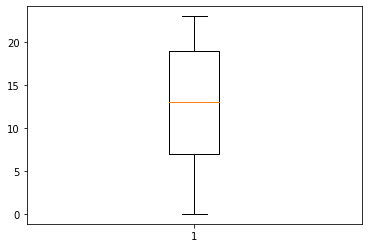

In [29]:
#checking spread of request hour
plt.boxplot(dataUber['RequestHour'])
plt.show()

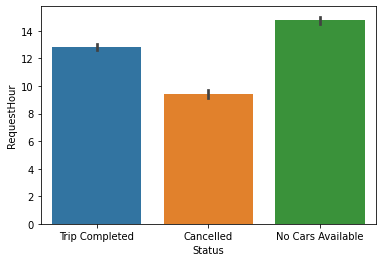

In [30]:
#barplot of RequestHour and Status
sb.barplot(x='Status',y='RequestHour', data=dataUber)

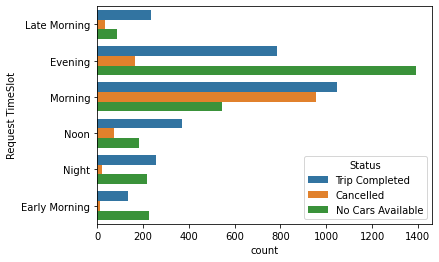

In [31]:
sb.countplot(y=dataUber['Request TimeSlot'],hue =dataUber['Status'] ,data = dataUber)

Inferences from the above count plot
1) Drivers are cancelling more Morning trips 
2) very few cars available in the evening 

In [32]:
#Status with respect to RequestHour
dataUber.groupby(['RequestHour','Status']).size()

RequestHour  Status           
0            Cancelled              3
             No Cars Available     56
             Trip Completed        40
1            Cancelled              4
             No Cars Available     56
                                 ... 
22           No Cars Available    138
             Trip Completed       154
23           Cancelled             10
             No Cars Available     81
             Trip Completed       103
Length: 72, dtype: int64

In [33]:
#making demand and supply columns 
#denote Demand with 1
#denote Supply with 0
dataUber['Demand'] = 1 # demand is a sure value hence intially we can say it is
dataUber['Supply'] = 0 # supply -> we can't say that the Trip completed or not without looking at the data hence put it 0 and later we will update the rows which fulfills the demand

#Trip completed means there is a supply , hence update the values 
dataUber.loc[(dataUber['Status'] == 'Trip Completed'),'Supply'] = 1
dataUber.tail()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp,RequestHour,Request TimeSlot,Demand,Supply
6740,6745,City,No Cars Available,2016-07-15 23:49:03,NaT,23,Night,1,0
6741,6752,Airport,No Cars Available,2016-07-15 23:50:05,NaT,23,Night,1,0
6742,6751,City,No Cars Available,2016-07-15 23:52:06,NaT,23,Night,1,0
6743,6754,City,No Cars Available,2016-07-15 23:54:39,NaT,23,Night,1,0
6744,6753,Airport,No Cars Available,2016-07-15 23:55:03,NaT,23,Night,1,0


In [34]:
#now we can find demand-supply gap

#define a new column 'Gap'

dataUber['Gap'] = dataUber['Demand']-dataUber['Supply']
dataUber['Gap']

0       0
1       0
2       0
3       0
4       0
       ..
6740    1
6741    1
6742    1
6743    1
6744    1
Name: Gap, Length: 6745, dtype: int64

In [35]:
#Replace 1(supply fulfilled) by 'Trip Completed'
#Replace 0(supply not fulfilled) by 'Trip Not Completed'
#for better readability 
dataUber.loc[dataUber['Gap'] == 1,'Gap'] = 'Trip Not Completed'
dataUber.loc[dataUber['Gap'] == 0,'Gap'] = 'Trip Completed'
dataUber['Gap']

0           Trip Completed
1           Trip Completed
2           Trip Completed
3           Trip Completed
4           Trip Completed
               ...        
6740    Trip Not Completed
6741    Trip Not Completed
6742    Trip Not Completed
6743    Trip Not Completed
6744    Trip Not Completed
Name: Gap, Length: 6745, dtype: object

In [36]:
#inspection of the data
dataUber.head()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp,RequestHour,Request TimeSlot,Demand,Supply,Gap
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Late Morning,1,1,Trip Completed
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening,1,1,Trip Completed
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Morning,1,1,Trip Completed
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Evening,1,1,Trip Completed
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning,1,1,Trip Completed


In [37]:
dataUber.tail()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp,RequestHour,Request TimeSlot,Demand,Supply,Gap
6740,6745,City,No Cars Available,2016-07-15 23:49:03,NaT,23,Night,1,0,Trip Not Completed
6741,6752,Airport,No Cars Available,2016-07-15 23:50:05,NaT,23,Night,1,0,Trip Not Completed
6742,6751,City,No Cars Available,2016-07-15 23:52:06,NaT,23,Night,1,0,Trip Not Completed
6743,6754,City,No Cars Available,2016-07-15 23:54:39,NaT,23,Night,1,0,Trip Not Completed
6744,6753,Airport,No Cars Available,2016-07-15 23:55:03,NaT,23,Night,1,0,Trip Not Completed


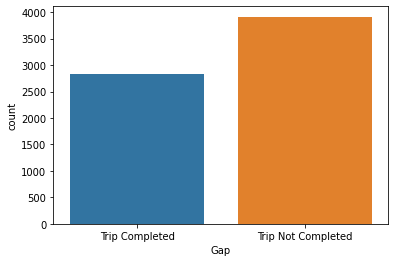

In [38]:
sb.countplot(x=dataUber['Gap'], data = dataUber)

Inference : Trip Not Completed count is significantly more 

City as a pickup point

As per the review, the morning time slot is most troublesome when requests are cancelled. 

Most likely, the requests are scrapped by the drivers due to the morning rush because it is the office hours and then seeing the destination as an Airpot too far away, the driver would think he would gain more for shorter trips inside the town.

Airpot as a pickup point

The night time slot seems to be the most problematic. The explanation appears to be that there are not enough cars available to meet the demands, as the cars might not be accessible at the airport due to the cars inside the town.

Conclusion : 
    
1) Making a permanent stand can resolve the problem at the airport
2) Uber can provide more money to the drivers who are serving to the airport
